<a href="https://colab.research.google.com/github/abou-zithar/Count-M-and-M-s-candy/blob/main/Copy_of_Count_M%26M's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [211]:
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow
import imutils

In [212]:
def preprocessing_image(image):
  
  output = cv2.resize(image, (600,600))
  hsvFrame = cv2.cvtColor(output, cv2.COLOR_BGR2HSV)
  return hsvFrame,output


Thresholding & masking 

In [213]:
def create_masks(hsvFrame):

  kernal = np.ones((5, 5), "uint8")
  
  red_lower = np.array([160, 170, 100], np.uint8)
  red_upper = np.array([180, 255, 255], np.uint8)
  red_mask = cv2.inRange(hsvFrame, red_lower, red_upper)
  red_mask = cv2.dilate(red_mask, kernal)

  blue_lower = np.array([88, 80, 100], np.uint8)
  blue_upper = np.array([120, 255, 255], np.uint8)
  blue_mask = cv2.inRange(hsvFrame, blue_lower, blue_upper)
  blue_mask = cv2.dilate(blue_mask, kernal)

  green_lower = np.array([32, 70, 100], np.uint8)
  green_upper = np.array([60, 255, 155], np.uint8)
  green_mask = cv2.inRange(hsvFrame, green_lower, green_upper)
  green_mask = cv2.dilate(green_mask, kernal)

  yellow_lower = np.array([27, 80, 180], np.uint8)
  yellow_upper = np.array([30, 255, 255], np.uint8)
  yellow_mask = cv2.inRange(hsvFrame, yellow_lower, yellow_upper)
  yellow_mask = cv2.dilate(yellow_mask, kernal)

  brown_lower = np.array([2, 125, 50], np.uint8)
  brown_upper = np.array([12, 255, 80], np.uint8) #15, 255, 150
  brown_mask = cv2.inRange(hsvFrame, brown_lower, brown_upper)
  brown_mask = cv2.dilate(brown_mask, kernal)

  orange_lower = np.array([5, 140, 170], np.uint8)
  orange_upper = np.array([13, 230, 255], np.uint8)
  orange_mask = cv2.inRange(hsvFrame, orange_lower, orange_upper)
  orange_mask = cv2.dilate(orange_mask, kernal)

  return red_mask,blue_mask,green_mask,yellow_mask,brown_mask,orange_mask


#function to count contour for each color

In [214]:
def contourColor(colorName, mask, B, G, R,output):
  counter = 0
  contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
  for pic, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    if(area > 300):
      x, y, w, h = cv2.boundingRect(contour)
      colorImageFrame = cv2.rectangle(output, (x, y),(x + w, y + h),(B, G, R), 2)
      
      counter = counter + 1
  return counter



In [215]:
def counterText(x, y, color, colorCounter,output):
  cv2.putText(output, color + ": " + str(colorCounter), (x, y),cv2.FONT_HERSHEY_COMPLEX_SMALL, 1,(0, 0, 0), 1)


In [216]:
def detect_all_colors(red_mask,blue_mask,orange_mask,green_mask,yellow_mask,brown_mask,output):

  redCounter = contourColor('red',red_mask,0, 255, 0,output)
  blueCounter = contourColor('Blue', blue_mask, 255, 0, 0,output)
  orangeCounter = contourColor('Orange', orange_mask, 0, 255, 0,output)
  counterText(50, 500, "Orange", orangeCounter,output)
  greenCounter = contourColor('Green', green_mask, 0, 255, 0,output)
  yellowCounter = contourColor('Yellow', yellow_mask, 0, 255, 0,output)
  brownCounter = contourColor('Brown', brown_mask, 0, 255, 0,output)
  total_counter=redCounter+blueCounter+orangeCounter+greenCounter+yellowCounter+brownCounter
  counterText(50, 450, "total_count", total_counter,output)


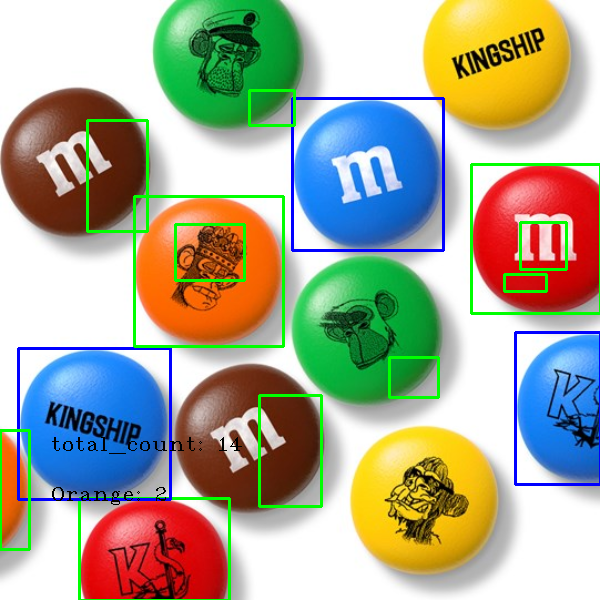

In [217]:
image=cv2.imread("M&M.jfif")
hsvFrame,output=preprocessing_image(image)
red_mask,blue_mask,green_mask,yellow_mask,brown_mask,orange_mask=create_masks(hsvFrame)
detect_all_colors(red_mask,blue_mask,orange_mask,green_mask,yellow_mask,brown_mask,output)
cv2_imshow(output)

In [218]:
# import os

# def load_images_from_folder(folder):
#     images = []
#     for filename in os.listdir(folder):
#         img = cv2.imread(os.path.join(folder,filename))
#         hsvFrame,output=preprocessing_image(img)
#         red_mask,blue_mask,green_mask,yellow_mask,brown_mask,orange_mask=create_masks(hsvFrame)
#         detect_all_colors(red_mask,blue_mask,orange_mask,green_mask,yellow_mask,brown_mask,output)
#         cv2_imshow(output)
#         if output is not None:
#             images.append(output)
#     return images